# **Assignment: Build a Logistic Regression Model for Diabetes Prediction**


1.	Objective: The objective of this assignment is to build a predictive model to predict the likelihood of a patient having diabetes based on certain features.


## **01. DATA PREPARATION**

**a. Load the dataset, Explore the dataset to understand its structure and contents**

In [217]:
#1. import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [218]:
#2. load the dataset
diabetes_df = pd.read_csv('/content/diabetes2.csv')

In [219]:
#3. Display the first 5 rows of the DataFrame
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [220]:
#4. Display the last 5 rows of the DataFrame
diabetes_df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [221]:
#5. dataset shape
diabetes_df.shape

(768, 9)

In [222]:
#6. dataset columns info
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [223]:
#7. Print information about the DataFrame
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [224]:
#8. Get descriptive analysis
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

**b. Data cleaning and perform preprocessing**

In [225]:
#1. check for missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
#2. Removecheck for  duplicates
diabetes_df.duplicated().sum()

0

In [227]:
#3. Dividing features into Numerical and Categorical
col = list(diabetes_df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(diabetes_df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Outcome
Numerical Features : Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


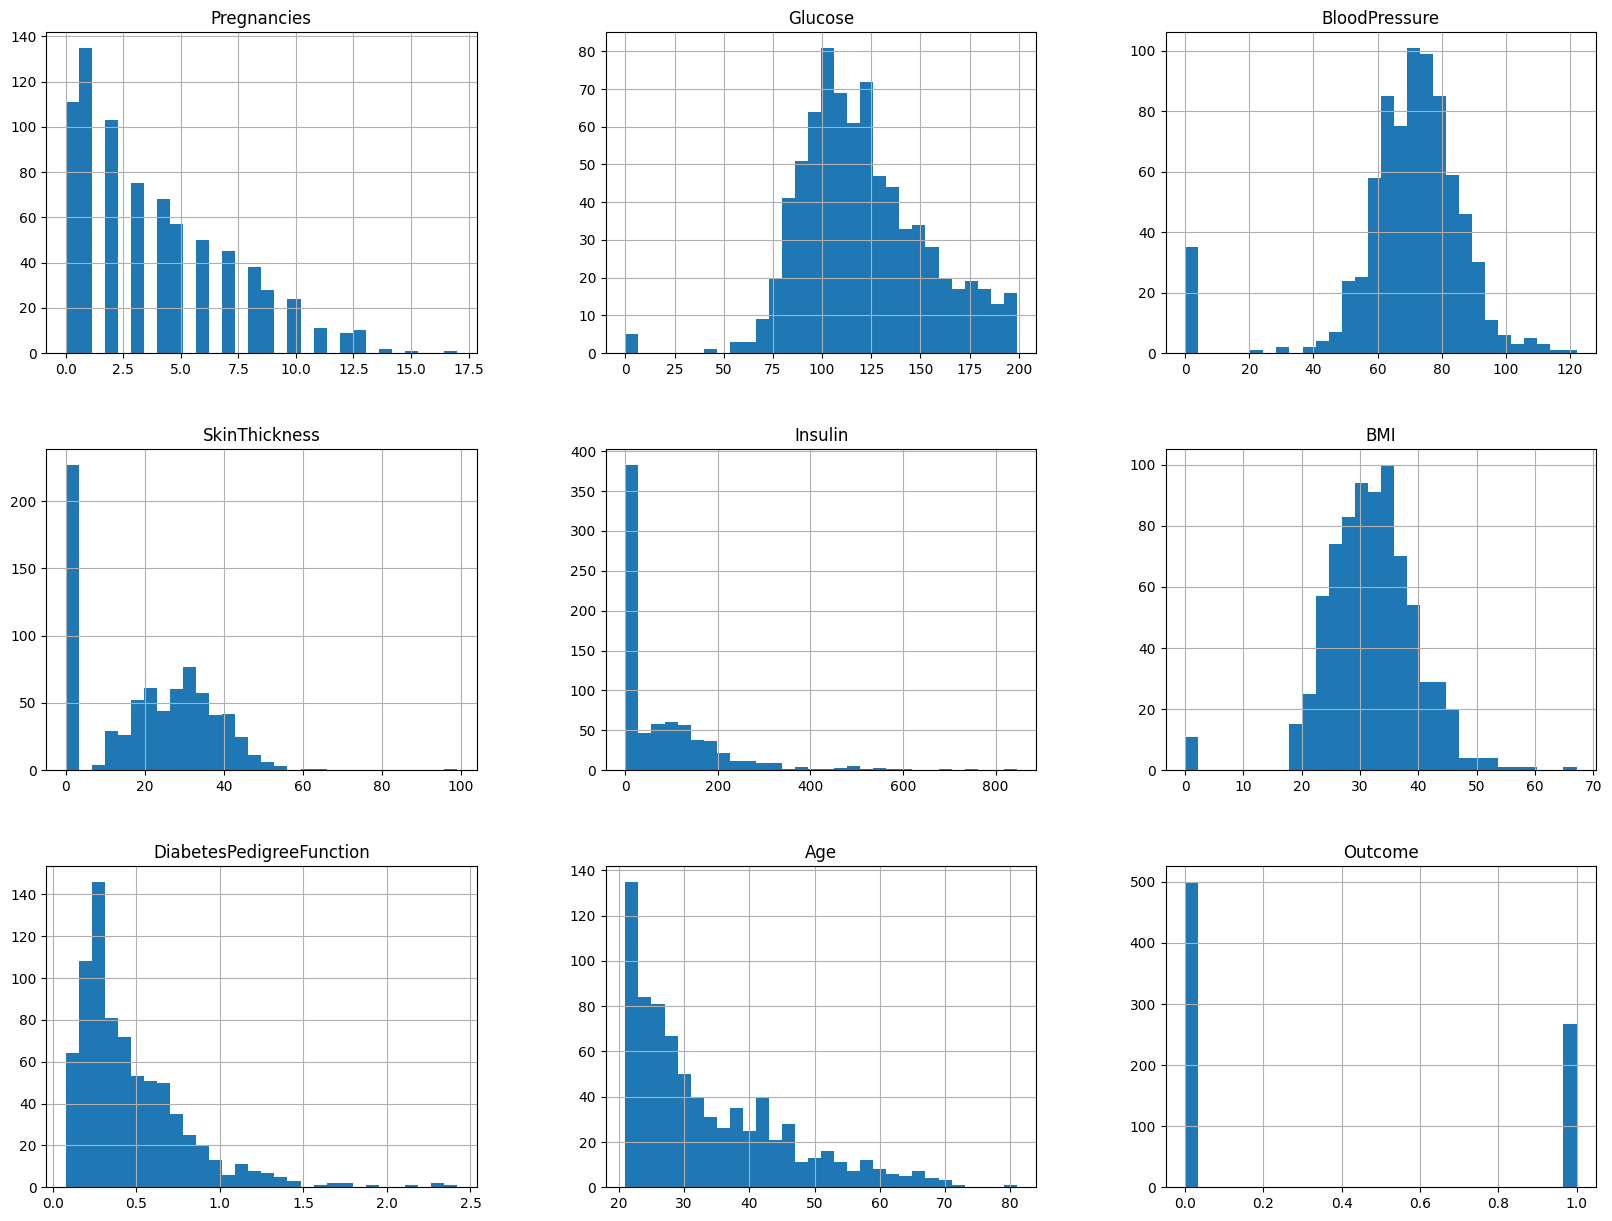

In [228]:
#4. Plotting histograms to see the frequency distribution

diabetes_df.hist(bins=30, figsize=(20,15))
plt.show()

There is an issue with this dataset, as certain numerical values, such as BP, skin thickness, etc., cannot realistically be zero.

Therefore replace missing values with the mean.

In [229]:
#5. Replacing the zero values with mean

diabetes_df['Glucose'] = diabetes_df['Glucose'].replace(0, diabetes_df['Glucose'].mean())
diabetes_df['BMI'] = diabetes_df['BMI'].replace(0, diabetes_df['BMI'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(0, diabetes_df['BloodPressure'].mean())
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0, diabetes_df['SkinThickness'].mean())
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0, diabetes_df['Insulin'].mean())

In [230]:
#6. check statistics again to make sure the replace of values
diabetes_df.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.000000   
Glucose                   768.0  121.681605  30.436016  44.000  99.750000   
BloodPressure             768.0   72.254807  12.115932  24.000  64.000000   
SkinThickness             768.0   26.606479   9.631241   7.000  20.536458   
Insulin                   768.0  118.660163  93.080358  14.000  79.799479   
BMI                       768.0   32.450805   6.875374  18.200  27.500000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.243750   
Age                       768.0   33.240885  11.760232  21.000  24.000000   
Outcome                   768.0    0.348958   0.476951   0.000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.00000  122.00  
SkinThickness              23.000000   32.00000   99.00  
Insulin                    79.799479  127.25000  846.00  
BMI                        32.000000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

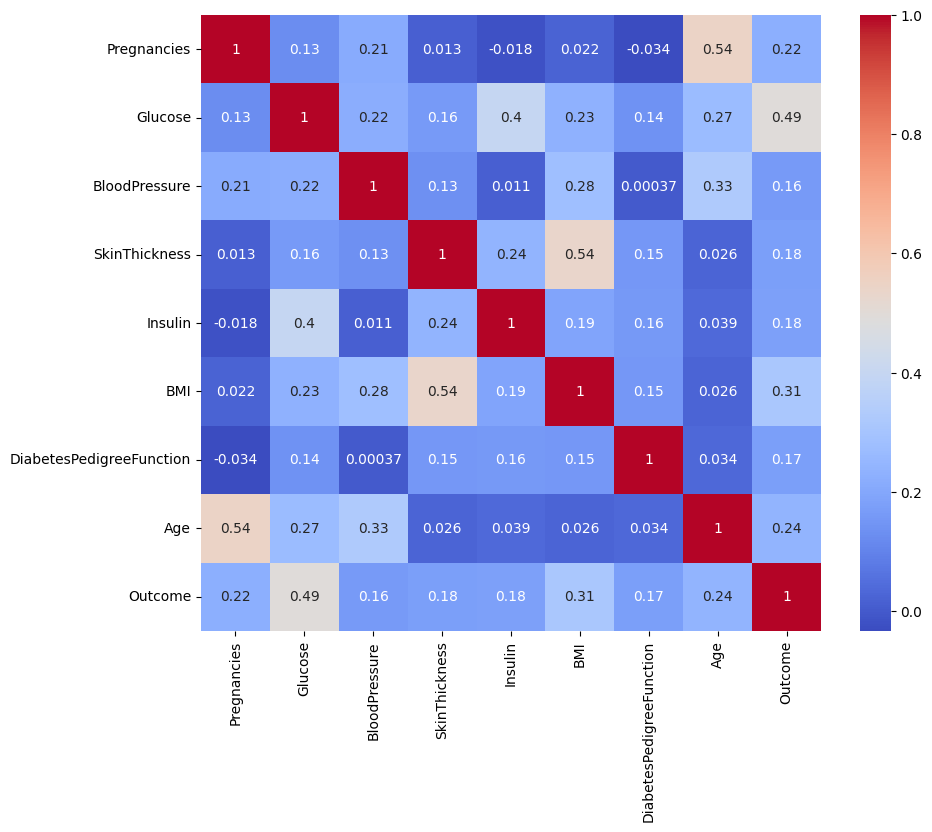

In [231]:
#7.Create heatmap to find co-realtion
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(),cmap = "coolwarm", annot= True)
plt.show()

In [232]:

#8. check correaltion values for the dataset
diabetes_df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231478                  0.137106   
BloodPressure             0.010926  0.281231                  0.000371   
SkinThickness             0.240361  0.535703                  0.154961   
Insulin                   1.000000  0.189856                  0.157806   
BMI                       0.189856  1.000000                  0.153508   
DiabetesPedigreeFunction  0.157806  0.153508                  1.000000   
Age                       0.038652  0.025748                  0.033561   
Outcome                   0.179185  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                   0.038652  0.179185  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

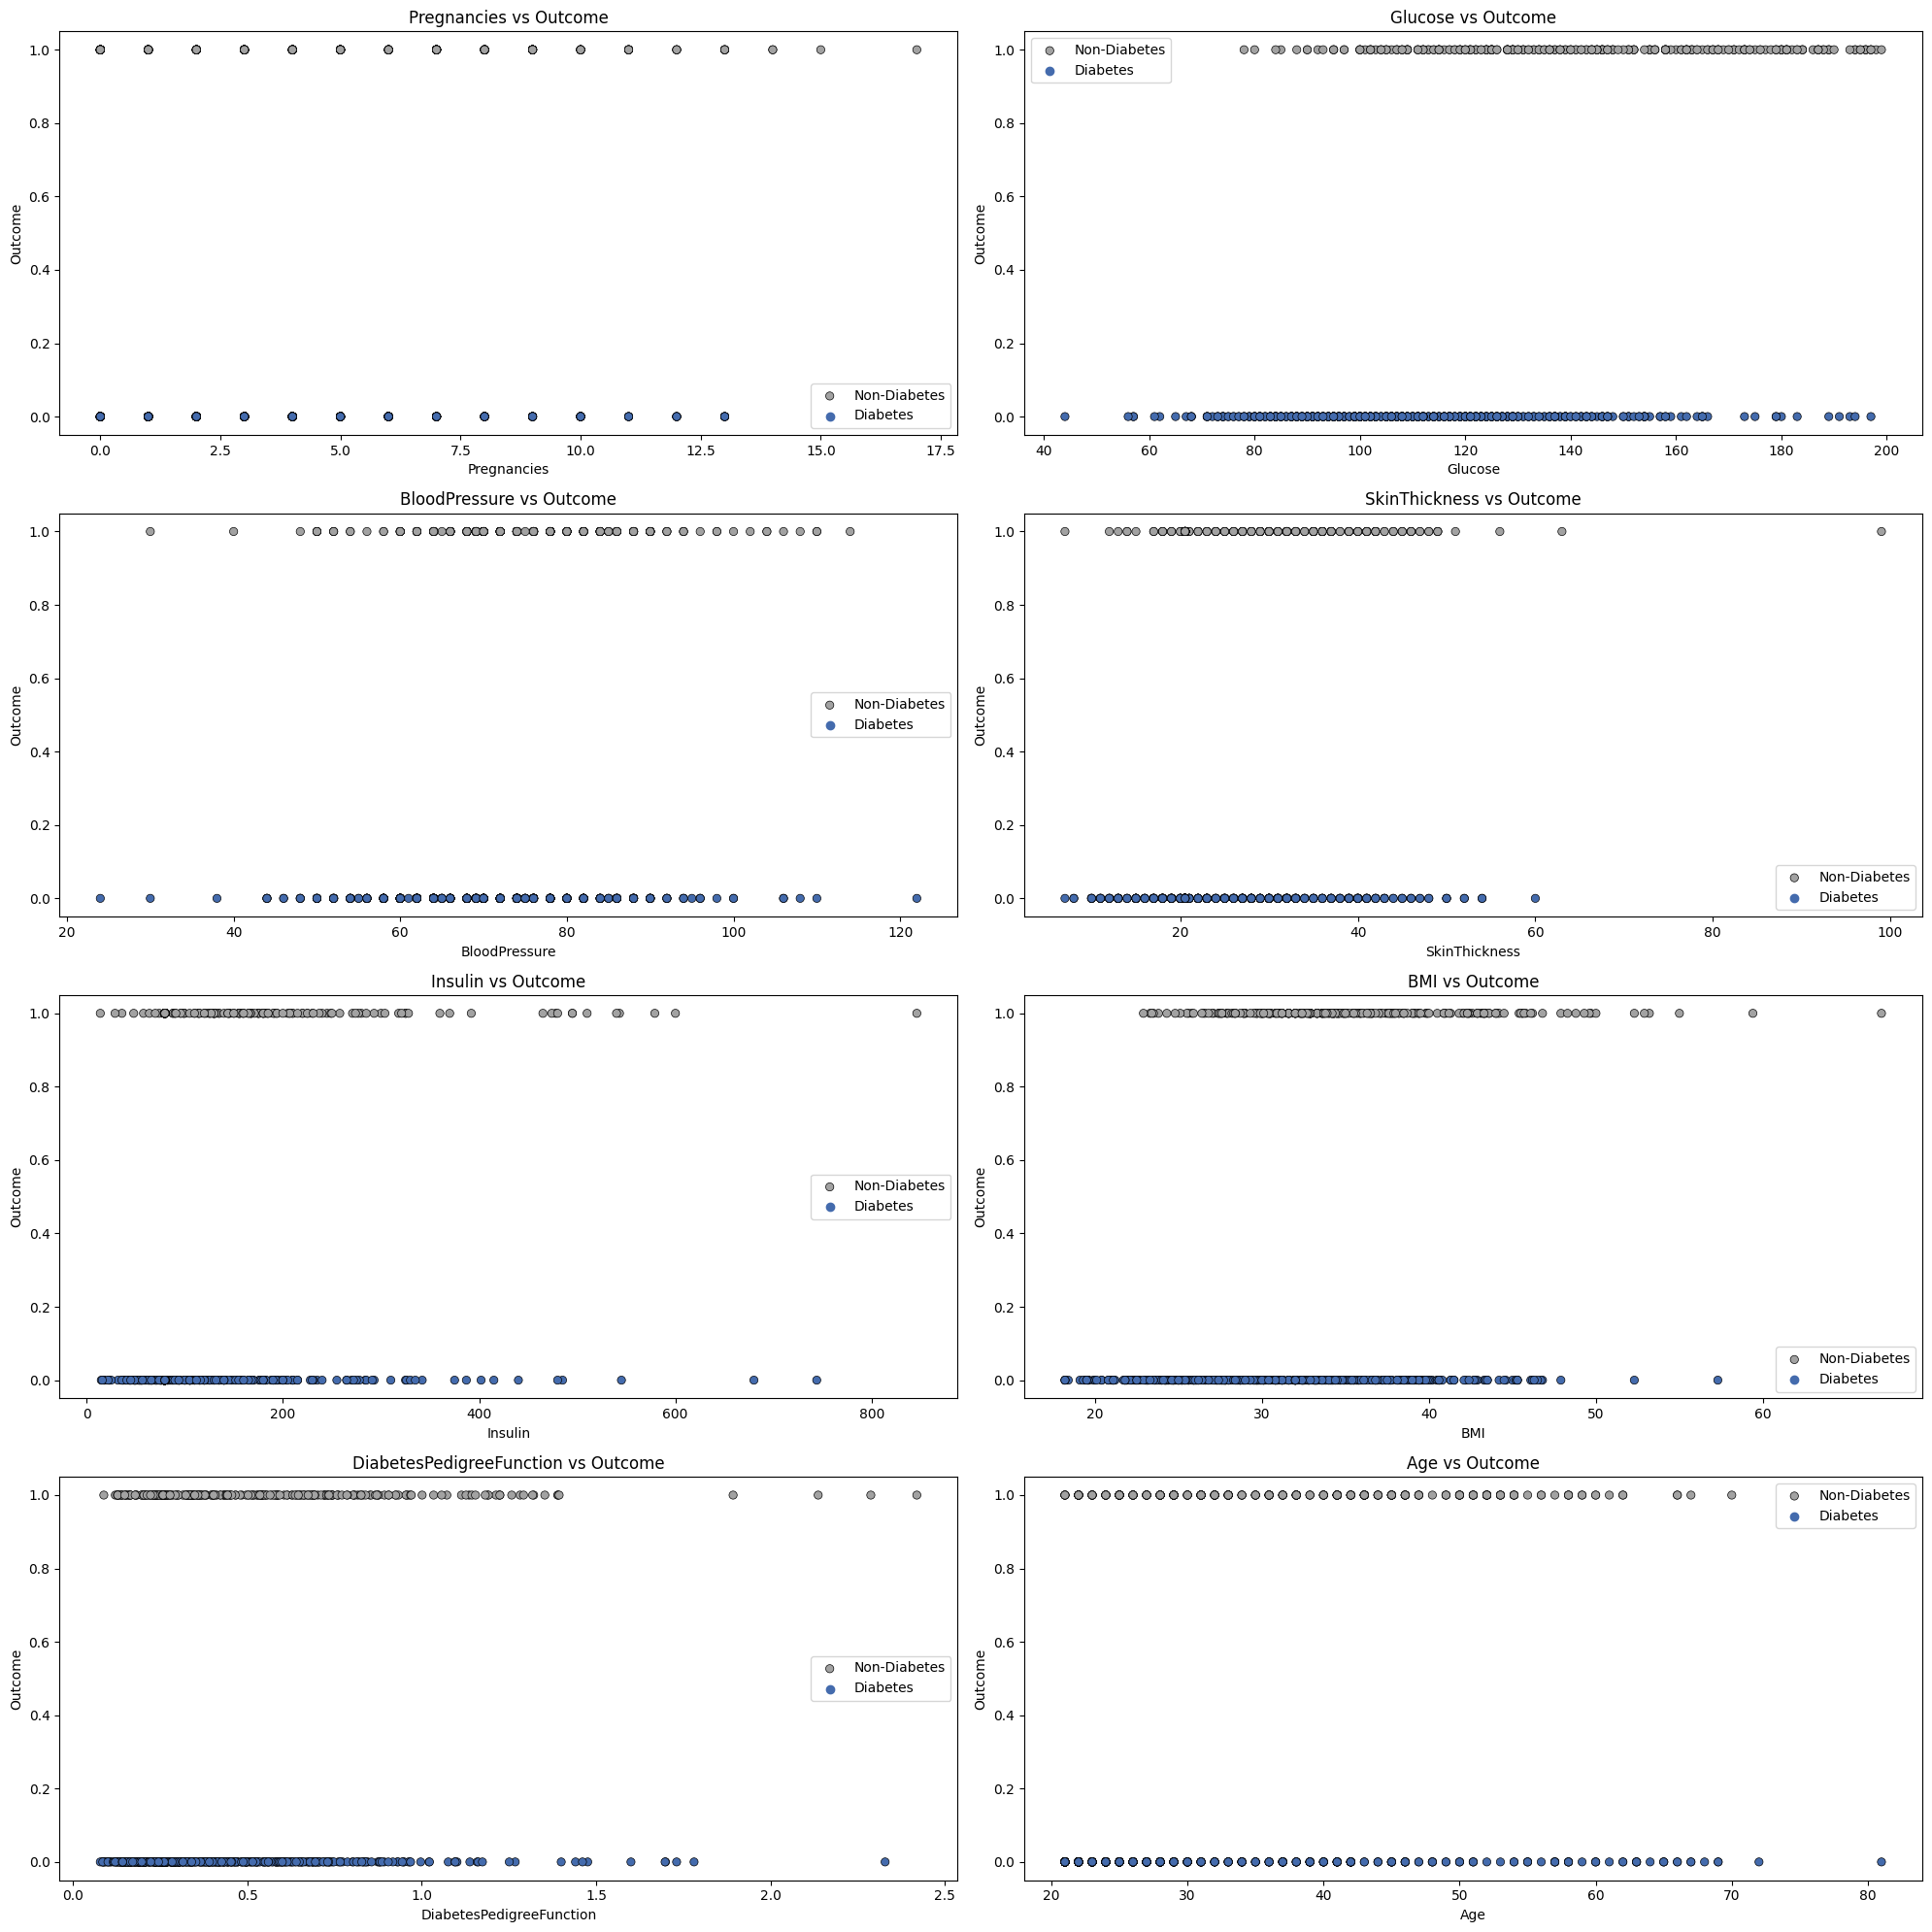

In [233]:
#9. Univariate Analysis - Target Variable(outcome) vs Features - SCATTER PLOT

# Set custom colors
colors = ['#446BAD', '#A2A2A2']

# Plot scatter plots for each numerical feature against Outcome
a = 0
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
target_variable = 'Outcome'
for i in range(len(numerical_features)):
    a += 1
    plt.subplot(4, 2, a)
    sns.scatterplot(x=numerical_features[i], y=target_variable, data=diabetes_df, hue=target_variable, palette=colors, edgecolor='black')
    plt.legend(['Non-Diabetes', 'Diabetes'])
    title = f'{numerical_features[i]} vs {target_variable}'
    plt.title(title)

plt.tight_layout()
plt.show()

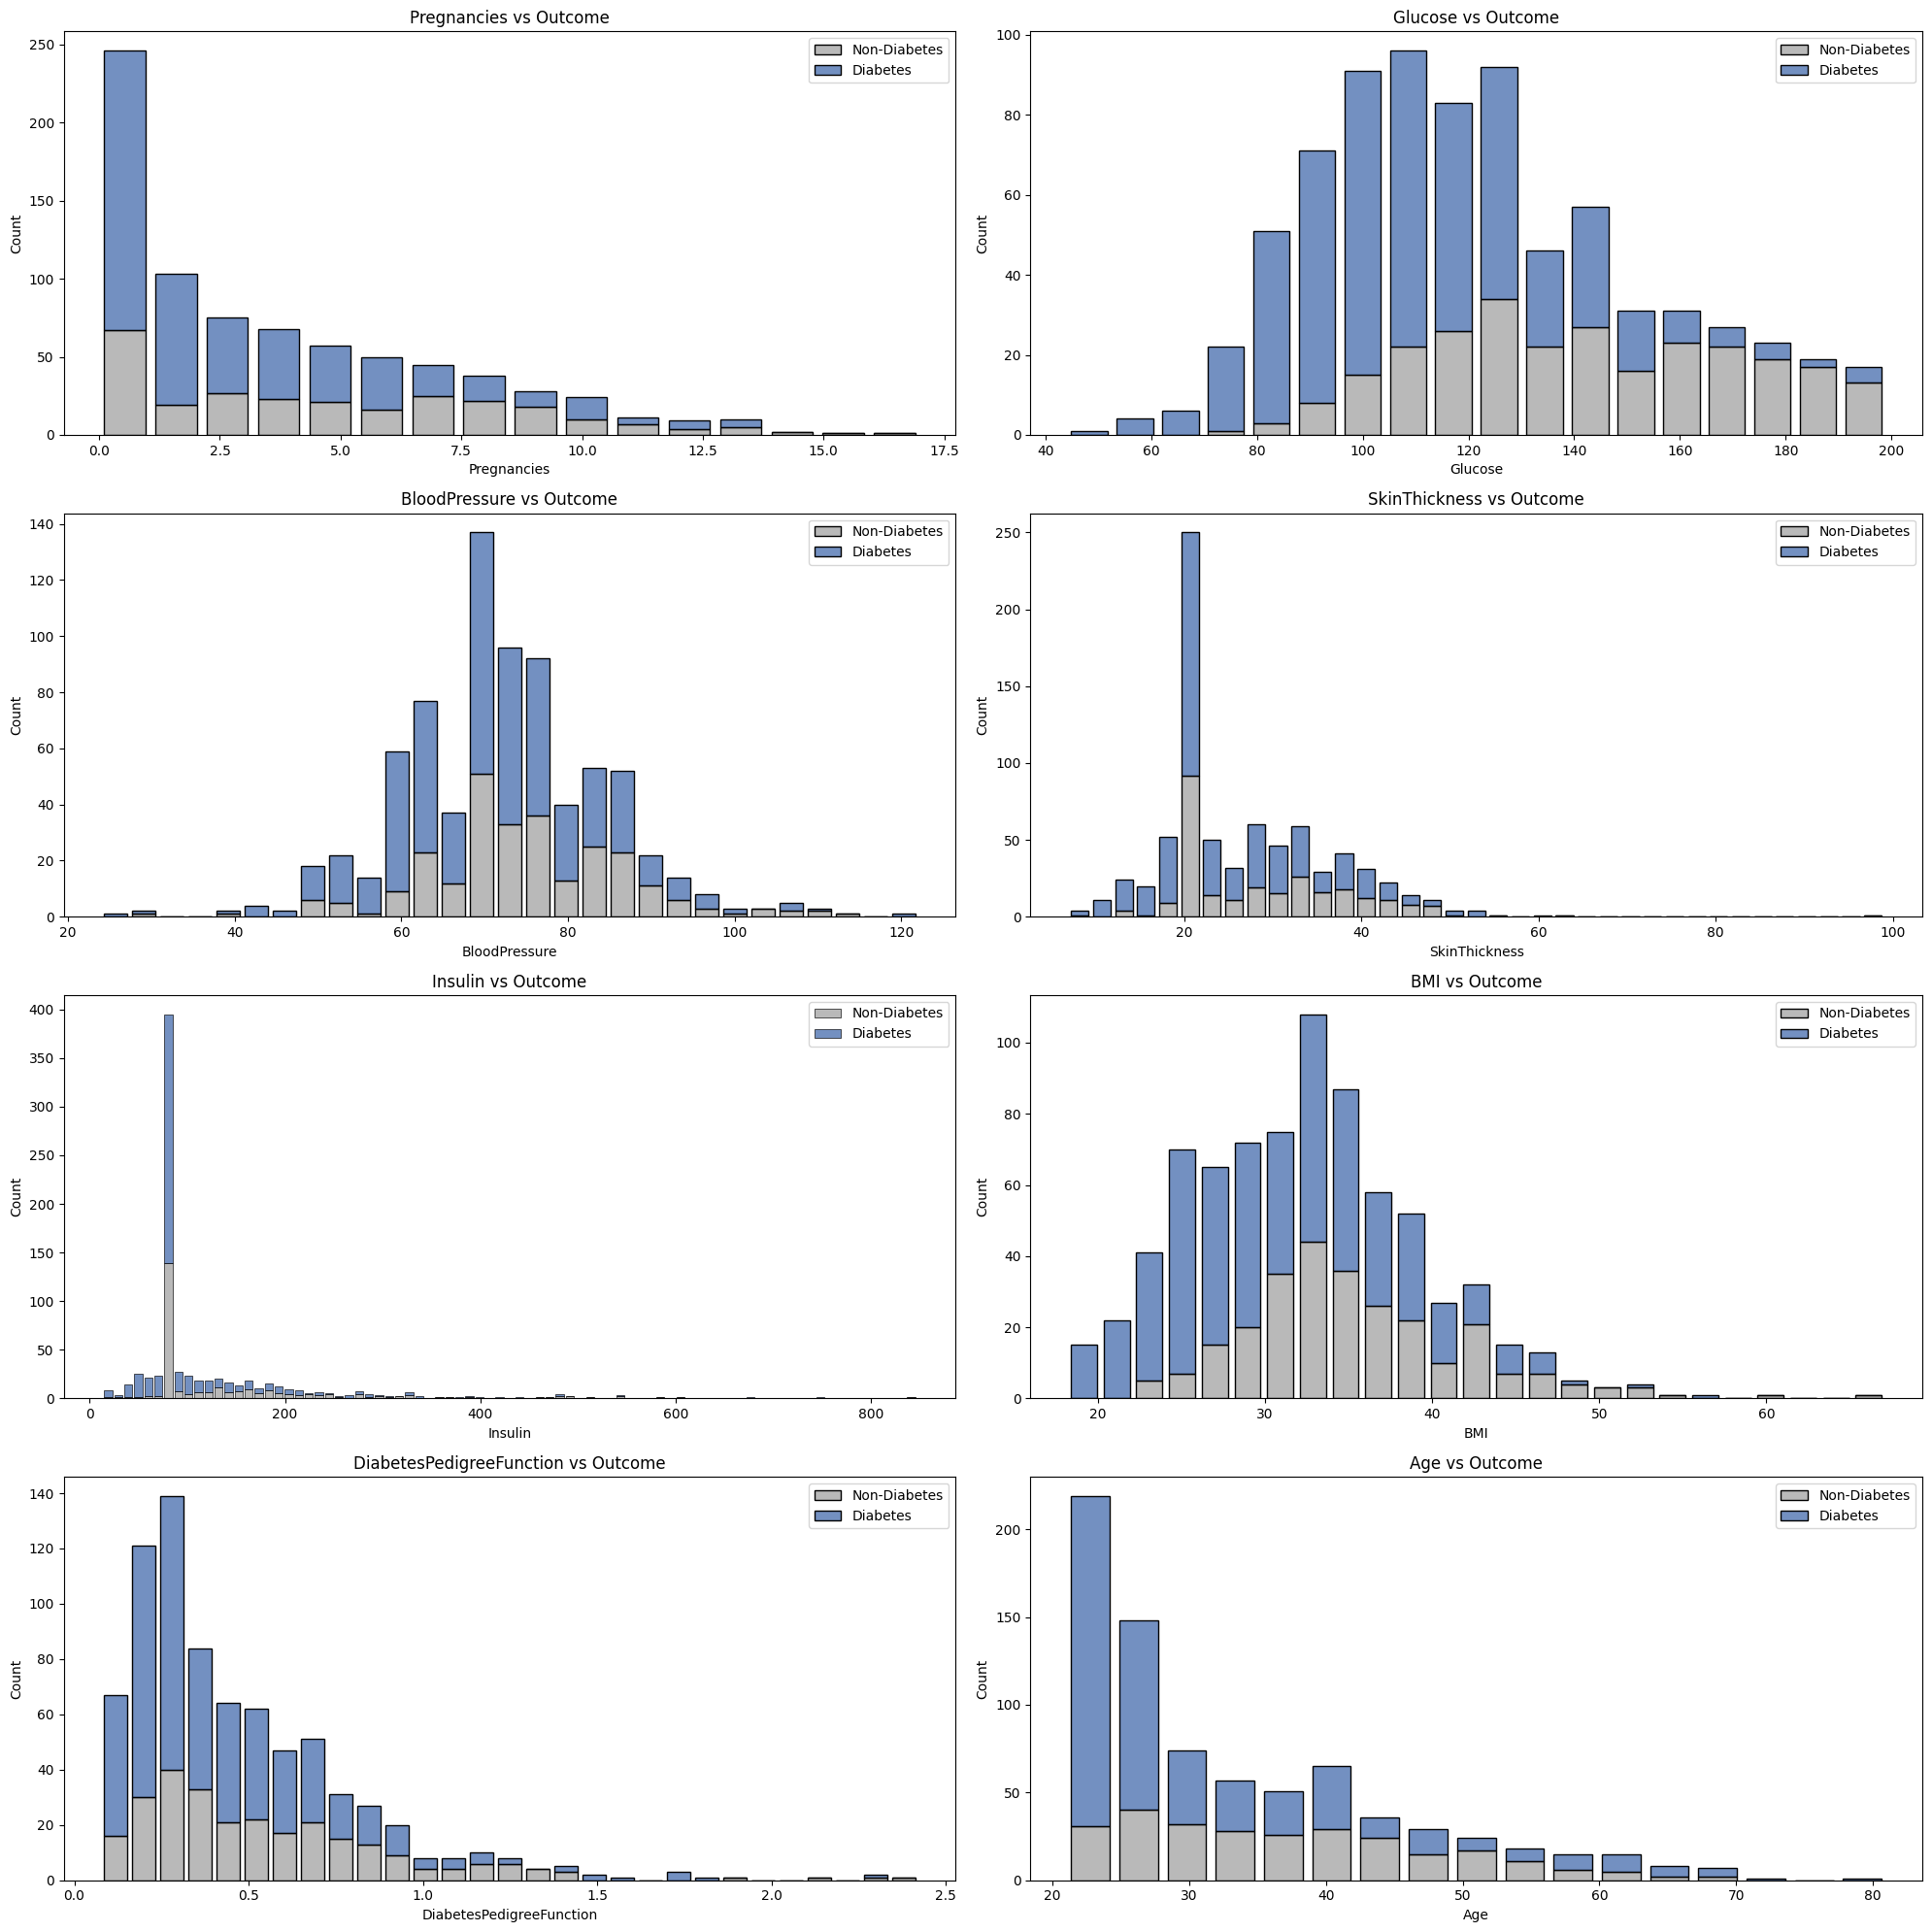

In [234]:
#10. Univariate Analysis - Target Variable(outcome) vs Features - HISTOGRAM

import matplotlib.pyplot as plt
import seaborn as sns

# Set custom colors
colors = ['#446BAD', '#A2A2A2']

# Plot histograms for each numerical feature against Outcome
a = 0
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
target_variable = 'Outcome'

for i in range(len(numerical_features)):
    a += 1
    plt.subplot(4, 2, a)
    sns.histplot(x=numerical_features[i], data=diabetes_df, hue=target_variable, multiple="stack", palette=colors, edgecolor='black', shrink=0.8)
    plt.legend(['Non-Diabetes', 'Diabetes'])
    title = f'{numerical_features[i]} vs {target_variable}'
    plt.title(title)

plt.tight_layout()
plt.show()


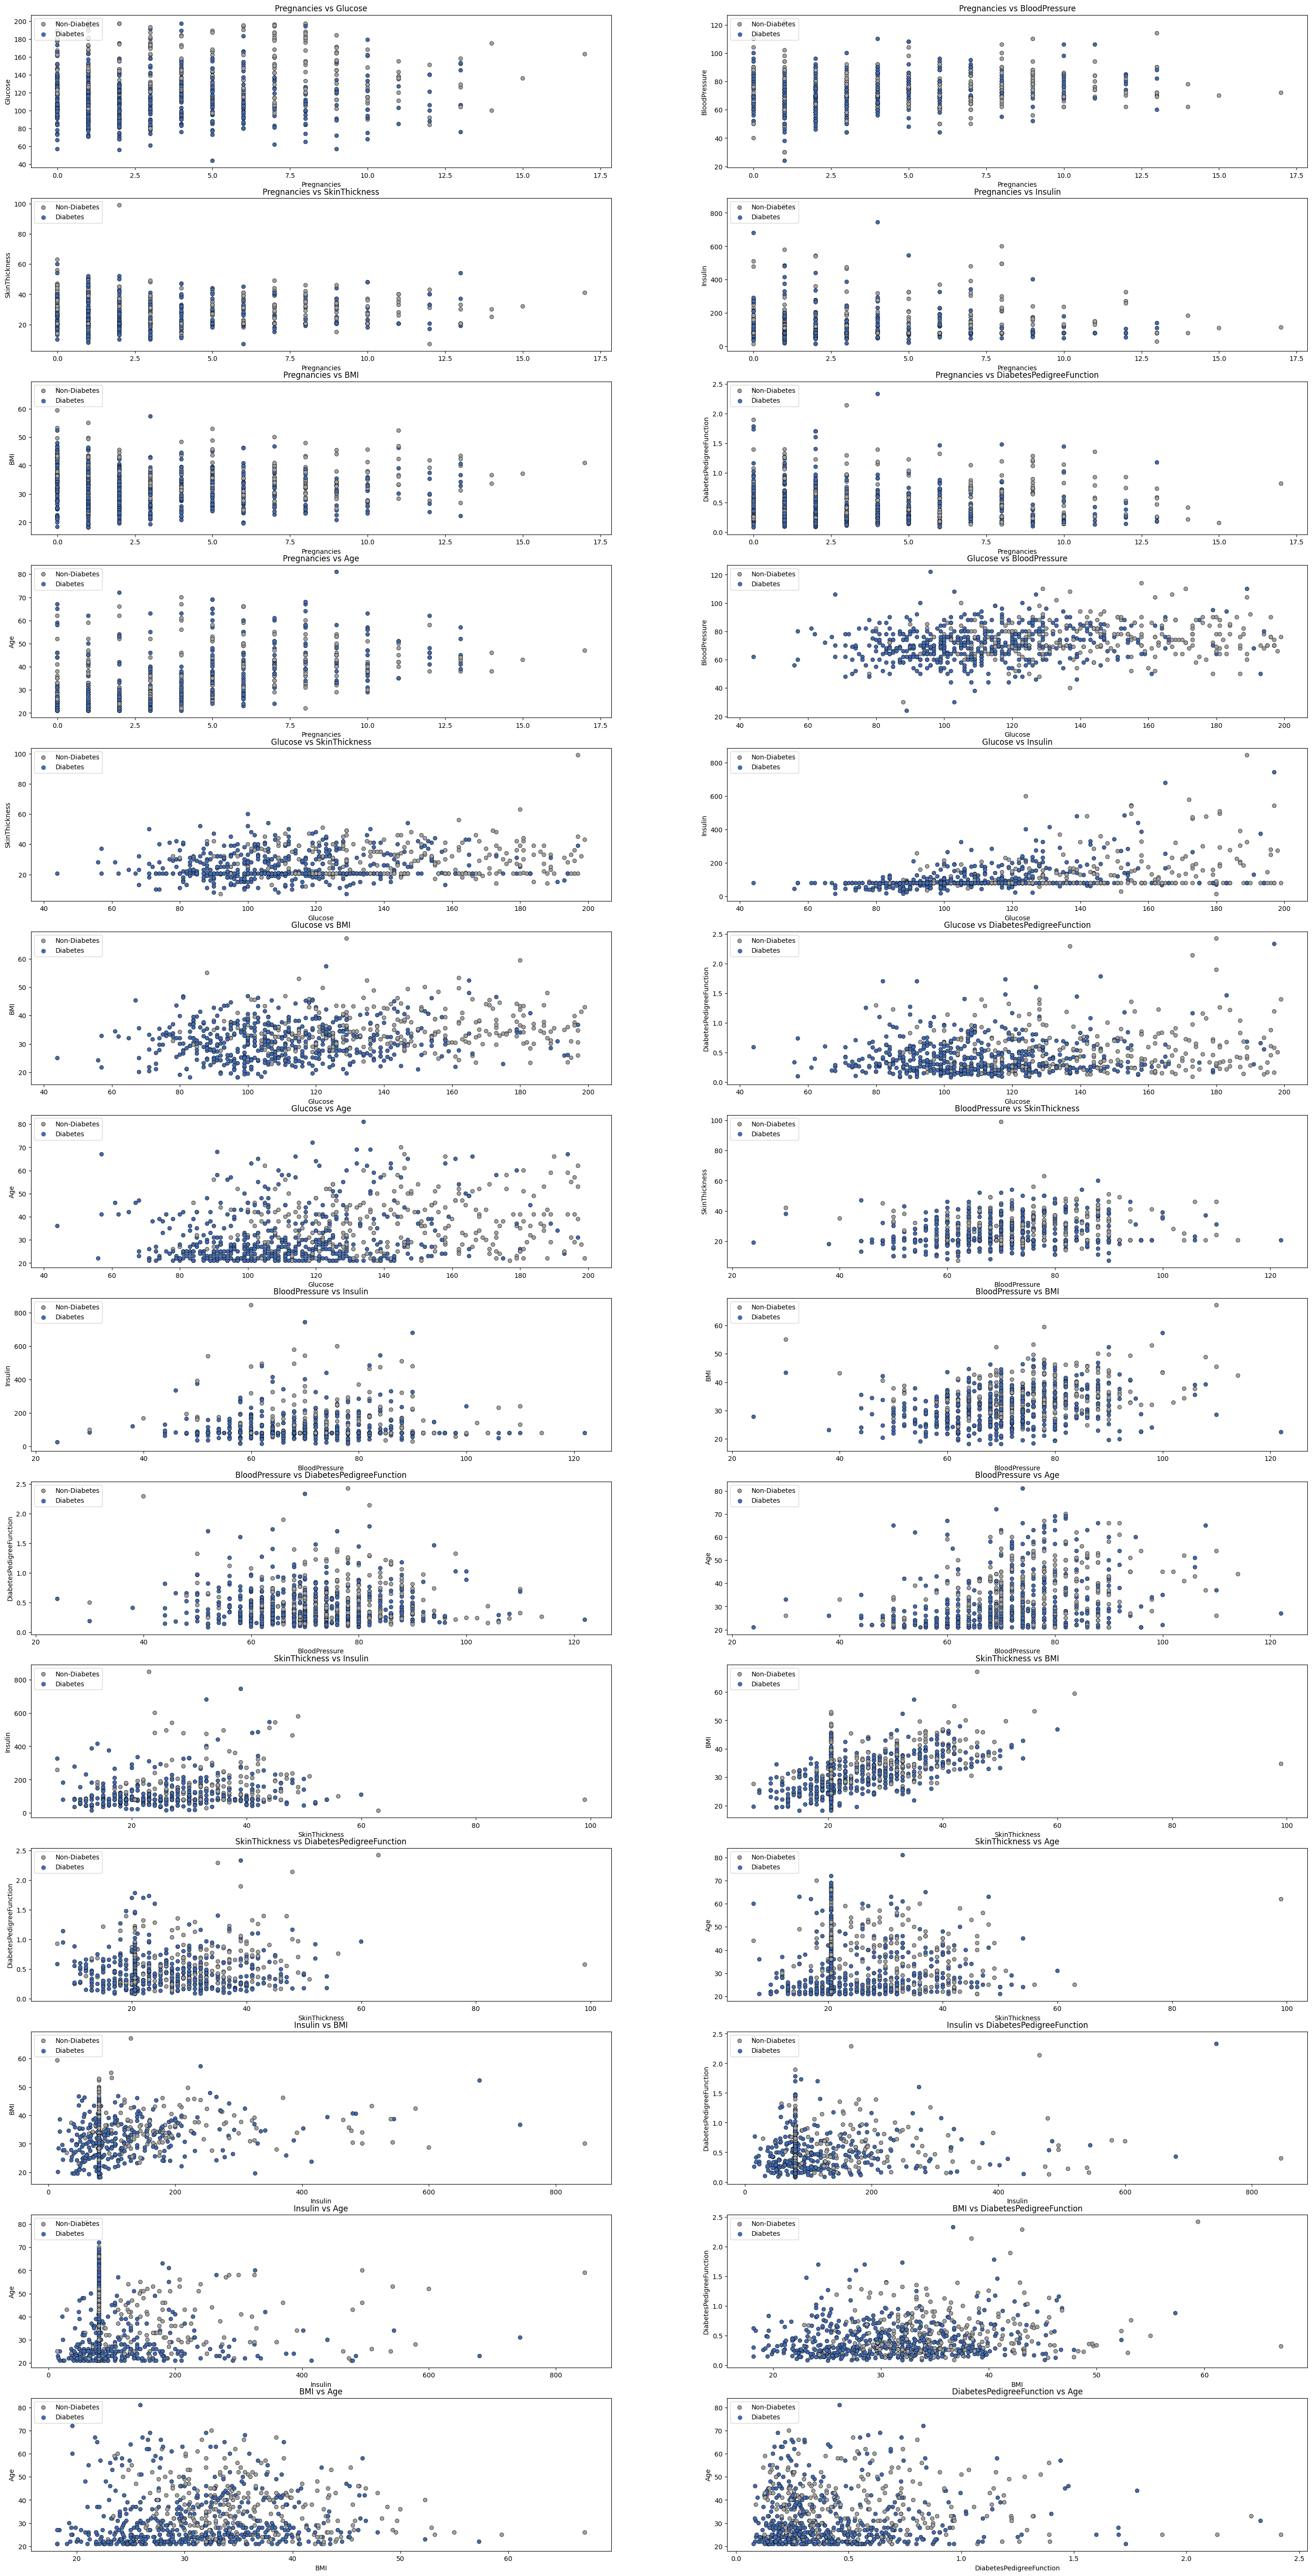

In [235]:
#11. Numerical features vs Numerical features w.r.t Target variable (Outcome)

colors = ['#446BAD','#A2A2A2']
a = 0
fig,ax = plt.subplots(nrows = 14,ncols = 2,figsize = (35,70))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(14,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = diabetes_df,hue = 'Outcome',palette = colors,edgecolor = 'black');
            plt.legend(['Non-Diabetes','Diabetes'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

In [236]:
#12. Counting the values for both categories

diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

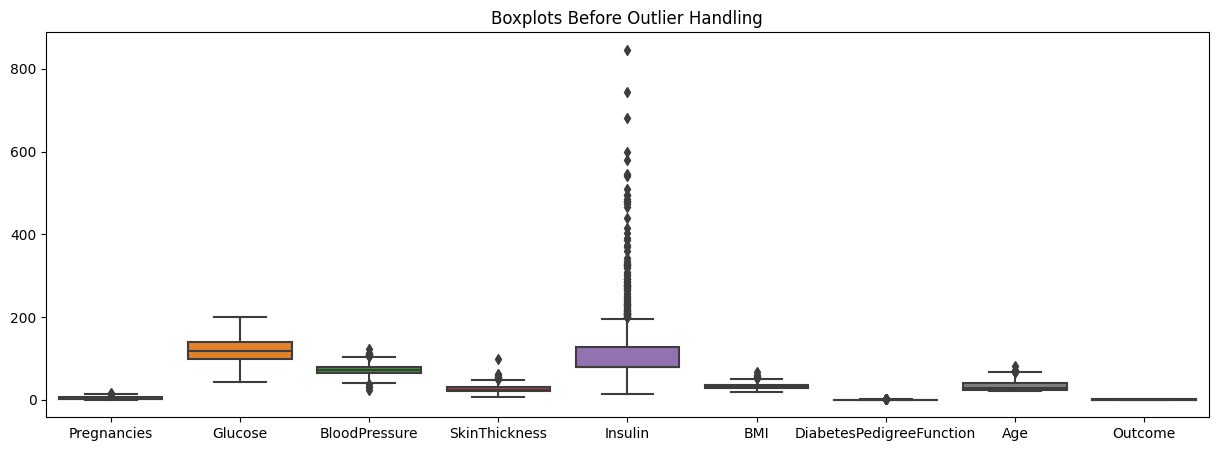

In [237]:
#13. Check outliers - create box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=diabetes_df)
plt.title('Boxplots Before Outlier Handling')
plt.show()

# ***Using initial dataset without oversampling- build a Logistic Regression Model***

**c. Split the data into a training set and a test set**

In [238]:
#1. Define variables
X = diabetes_df.drop(columns=['Outcome']) # input variables
y = diabetes_df['Outcome']  # Output variable

In [239]:
 #2. Split the data into a training set and a test set (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


In [240]:
#3. Standarization of data
scaler = StandardScaler()
# scaling for independent variables
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

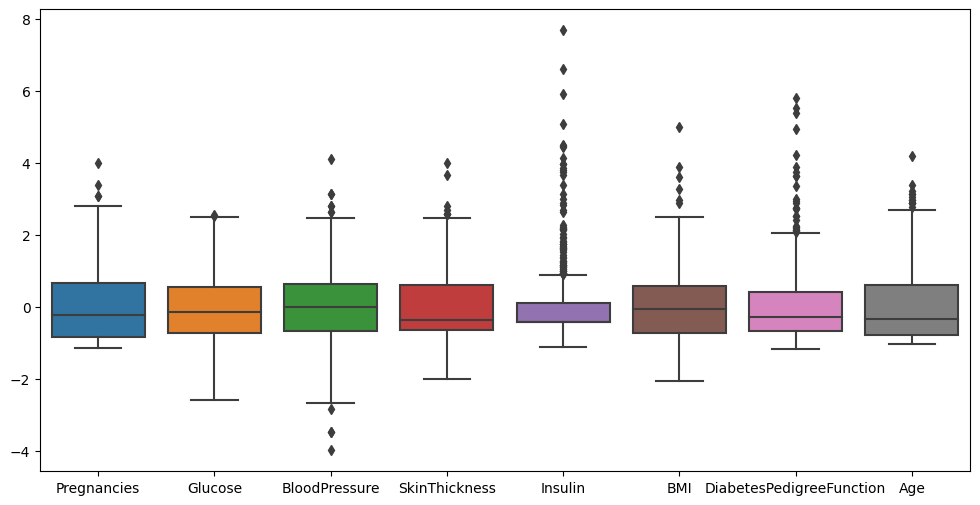

In [241]:
#4. with scaling
# Convert scaled data back to DataFrame with column names
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X.columns)

# Boxplot with scaled data
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_sc_df)
plt.show()

# **2.	Model Training**

**a. Use Logistic Regression model to predict the relationship between the independent variables- all numerical features and the dependent variable - categorical value( diabetes=0 and non-diabetics= 1)

In [242]:
# 1. Create and fit the multiple linear regression model to the training set
clf_model = LogisticRegression()
clf_model.fit(X_train_sc, y_train)

LogisticRegression()

In [243]:
# 2. Find probabilities on the test set
clf_model.predict_proba(X_test_sc)

array([[0.74085216, 0.25914784],
       [0.8272927 , 0.1727073 ],
       [0.89038968, 0.10961032],
       [0.84852405, 0.15147595],
       [0.53605745, 0.46394255],
       [0.58071201, 0.41928799],
       [0.98634383, 0.01365617],
       [0.59225165, 0.40774835],
       [0.42899498, 0.57100502],
       [0.22818685, 0.77181315],
       [0.77335102, 0.22664898],
       [0.10157941, 0.89842059],
       [0.64262596, 0.35737404],
       [0.70792494, 0.29207506],
       [0.92133815, 0.07866185],
       [0.61275053, 0.38724947],
       [0.88416717, 0.11583283],
       [0.92906588, 0.07093412],
       [0.25599993, 0.74400007],
       [0.40496577, 0.59503423],
       [0.81355128, 0.18644872],
       [0.92765719, 0.07234281],
       [0.50945271, 0.49054729],
       [0.90698682, 0.09301318],
       [0.44496951, 0.55503049],
       [0.10612143, 0.89387857],
       [0.89077844, 0.10922156],
       [0.97090681, 0.02909319],
       [0.74571181, 0.25428819],
       [0.89181393, 0.10818607],
       [0.

In [244]:
# 3. Make predictions on the test set
y_pred=clf_model.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## **3.	Model Evaluation**

**a. Evaluate the trained Logistic regression model's performance on the test dataset.**

In [245]:
# 1. Evaluate the model performance
# Import necessary libraries

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve
print('Accuracy_score', accuracy_score(y_test,y_pred))
print('Precision_score', precision_score(y_test,y_pred))
print('Recall_score', recall_score(y_test,y_pred))
print('F1_score', f1_score(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Confusion_matrix', confusion_matrix(y_test,y_pred))

Accuracy_score 0.7662337662337663
Precision_score 0.6862745098039216
Recall_score 0.6363636363636364
F1_score 0.660377358490566
Classification_report               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion_matrix [[83 16]
 [20 35]]


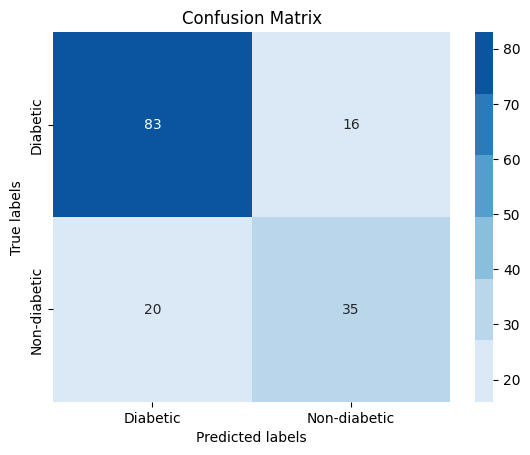

In [246]:
#2. create confusion matrix to identify TP,TN,FP,FN
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Custom color palette
colors = sns.color_palette("Blues")

# Create a bar chart with custom color
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap=colors)

# Labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])
ax.yaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])

plt.show()

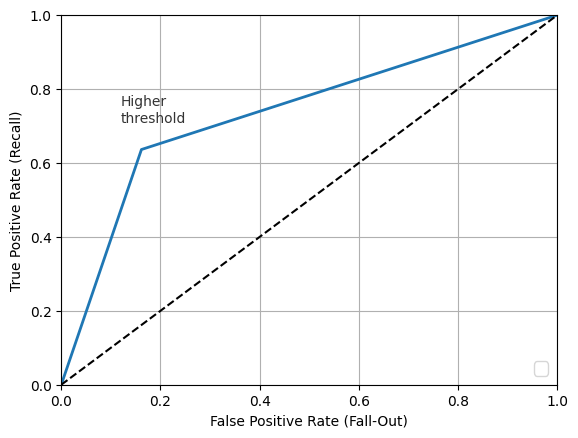

In [247]:
#3. Plot ROC_AUC Curve
# Assuming y_pred_prob is the predicted probabilities for the positive class
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()


# **4. SMOT - Synthetically Minority Oversampling Technique**

In [248]:
#1. import SMOTE library to do oversampling since the dataset is imbalanced
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)


In [249]:
#2. Check shape of oversampled dataset
X.sm ,y.sm=smote.fit_resample(X,y)
X.sm.shape, y.sm.shape

<ipython-input-249-d8545b1cad69>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.sm ,y.sm=smote.fit_resample(X,y)


((1000, 8), (1000,))

In [250]:
y.sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [251]:
#3,. Split the oversampled dataset
X_train, X_test, y_train, y_test = train_test_split(X.sm, y.sm, test_size=0.2, random_state=42)

In [252]:
#4. Do the scaling
scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

**a. Use Logistic Regression model to predict the relationship between the independent variables- all numerical features and the dependent variable - categorical value( diabetes=0 and non-diabetics= 1)-- using oversampled dataset

# ***Build a Logistic Regression Model for oversampled dataset ::***

In [253]:
# 5. Create and fit the logistic regression model to the training set
clf_model2 = LogisticRegression()
clf_model2.fit(X_train_sc, y_train)

LogisticRegression()

In [254]:
# 6. Find probabilities on the test set
clf_model2.predict_proba(X_test_sc)

array([[0.64416128, 0.35583872],
       [0.85519057, 0.14480943],
       [0.11930539, 0.88069461],
       [0.14098068, 0.85901932],
       [0.73412642, 0.26587358],
       [0.49250249, 0.50749751],
       [0.83706601, 0.16293399],
       [0.89461403, 0.10538597],
       [0.10273443, 0.89726557],
       [0.8401672 , 0.1598328 ],
       [0.22007639, 0.77992361],
       [0.90917185, 0.09082815],
       [0.76511612, 0.23488388],
       [0.12916435, 0.87083565],
       [0.02698025, 0.97301975],
       [0.14764475, 0.85235525],
       [0.29892592, 0.70107408],
       [0.18751834, 0.81248166],
       [0.01941508, 0.98058492],
       [0.084372  , 0.915628  ],
       [0.11815946, 0.88184054],
       [0.92571652, 0.07428348],
       [0.40683524, 0.59316476],
       [0.84469619, 0.15530381],
       [0.93568085, 0.06431915],
       [0.04252913, 0.95747087],
       [0.52521422, 0.47478578],
       [0.57674189, 0.42325811],
       [0.05648779, 0.94351221],
       [0.15471516, 0.84528484],
       [0.

In [255]:
# 7. Make predictions on the test set
y_pred=clf_model2.predict(X_test_sc)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

**Evaluate the trained Logistic regression model's performance on the test dataset.**

In [256]:
# 8. Evaluate the model performance
# Import necessary libraries

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve
print('Accuracy_score', accuracy_score(y_test,y_pred))
print('Precision_score', precision_score(y_test,y_pred))
print('Recall_score', recall_score(y_test,y_pred))
print('F1_score', f1_score(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Confusion_matrix', confusion_matrix(y_test,y_pred))

Accuracy_score 0.765
Precision_score 0.7547169811320755
Recall_score 0.7920792079207921
F1_score 0.7729468599033816
Classification_report               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.75      0.79      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion_matrix [[73 26]
 [21 80]]


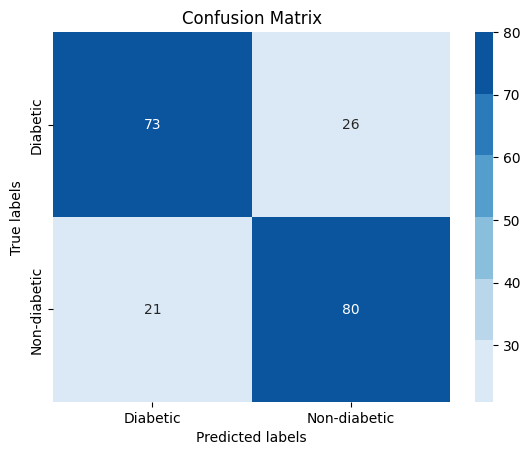

In [257]:
#9. create confusion matrix to identify TP,TN,FP,FN
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Custom color palette
colors = sns.color_palette("Blues")

# Create a bar chart with custom color
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap=colors)

# Labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])
ax.yaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])

plt.show()

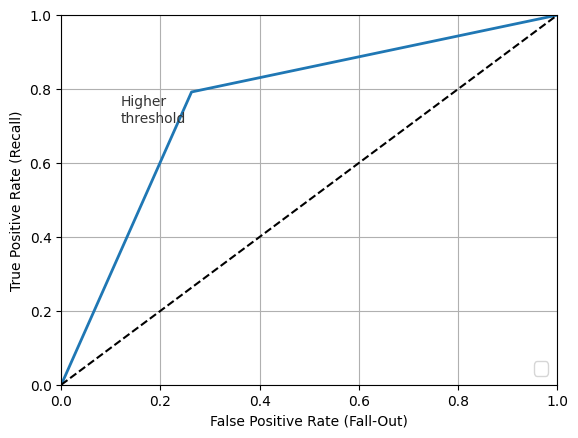

In [258]:
#10. Plot ROC_AUC Curve
# Assuming y_pred_prob is the predicted probabilities for the positive class
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, linewidth=2, label=None)

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()


# **5. Tuning the model with best hyperparameters using same oversampled split dataset**

In [259]:
from sklearn.model_selection import GridSearchCV

In [260]:
#1. Create logistic regression model
tuned_clf_model = LogisticRegression()

# Create logistic regression model
tuned_clf_model = LogisticRegression()

# Define the hyperparameter grid for Logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tuned_clf_model, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Fit the Logistic regression model with the best hyperparameters to the scaled training data
tuned_model = LogisticRegression(C=best_C)
tuned_model.fit(X_train_sc, y_train)  # Use scaled features



LogisticRegression(C=0.01)

In [261]:
# Make predictions on the test set
y_pred = tuned_model.predict(X_test_sc)

In [262]:
# 2. Evaluate the model performance
# Import necessary libraries

print('Accuracy_score', accuracy_score(y_test,y_pred))
print('Precision_score', precision_score(y_test,y_pred))
print('Recall_score', recall_score(y_test,y_pred))
print('F1_score', f1_score(y_test,y_pred))
print('Classification_report', classification_report(y_test,y_pred))
print('Confusion_matrix', confusion_matrix(y_test,y_pred))

Accuracy_score 0.765
Precision_score 0.7596153846153846
Recall_score 0.7821782178217822
F1_score 0.7707317073170732
Classification_report               precision    recall  f1-score   support

           0       0.77      0.75      0.76        99
           1       0.76      0.78      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion_matrix [[74 25]
 [22 79]]


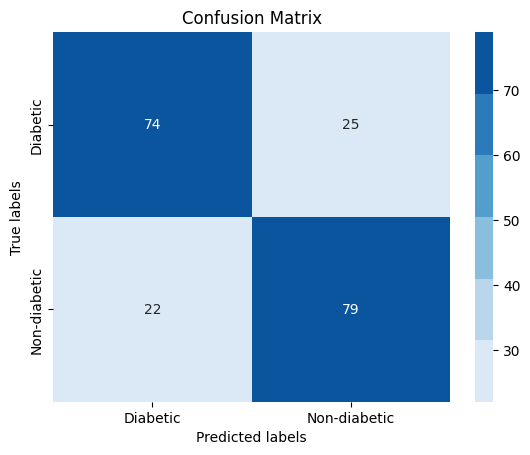

In [263]:
#3. create confusion matrix to identify TP,TN,FP,FN
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Custom color palette
colors = sns.color_palette("Blues")

# Create a bar chart with custom color
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap=colors)

# Labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])
ax.yaxis.set_ticklabels(['Diabetic', 'Non-diabetic'])

plt.show()

## **6. Use stochastic Gradient Descent with Cross Validation k=2**

In [264]:
#1. Create SGD classifier to evaluate performance of predicting diabetes

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_sc, y_train)

SGDClassifier(random_state=42)

In [265]:
#2. Get Cross-Validated Predictions

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Compute cross-validated accuracy
cv_accuracy = cross_val_score(sgd_clf, X_train_sc, y_train, cv=2, scoring='accuracy')
print("Accuracy of 2-folds:", cv_accuracy)

# Get cross-validated predictions
cv_predictions = cross_val_predict(sgd_clf, X_train_sc, y_train, cv=3)

# Compute confusion matrix
confusion_matrix_result = confusion_matrix(y_train, cv_predictions)
print("Confusion Matrix:")
print(confusion_matrix_result)

# Calculate precision
precision_cv = precision_score(y_train, cv_predictions)
print("Cross-Validated Precision:", precision_cv)

# Calculate recall
recall_cv = recall_score(y_train, cv_predictions)
print("Cross-Validated Recall:", recall_cv)

# Calculate F1 score
f1_score_cv = f1_score(y_train, cv_predictions)
print("Cross-Validated F1 Score:", f1_score_cv)

# Calculate mean accuracy
mean_accuracy = cv_accuracy.mean()
print("Mean Accuracy:", mean_accuracy)



Accuracy of 2-folds: [0.73  0.725]
Confusion Matrix:
[[272 129]
 [115 284]]
Cross-Validated Precision: 0.6876513317191283
Cross-Validated Recall: 0.7117794486215538
Cross-Validated F1 Score: 0.6995073891625616
Mean Accuracy: 0.7275


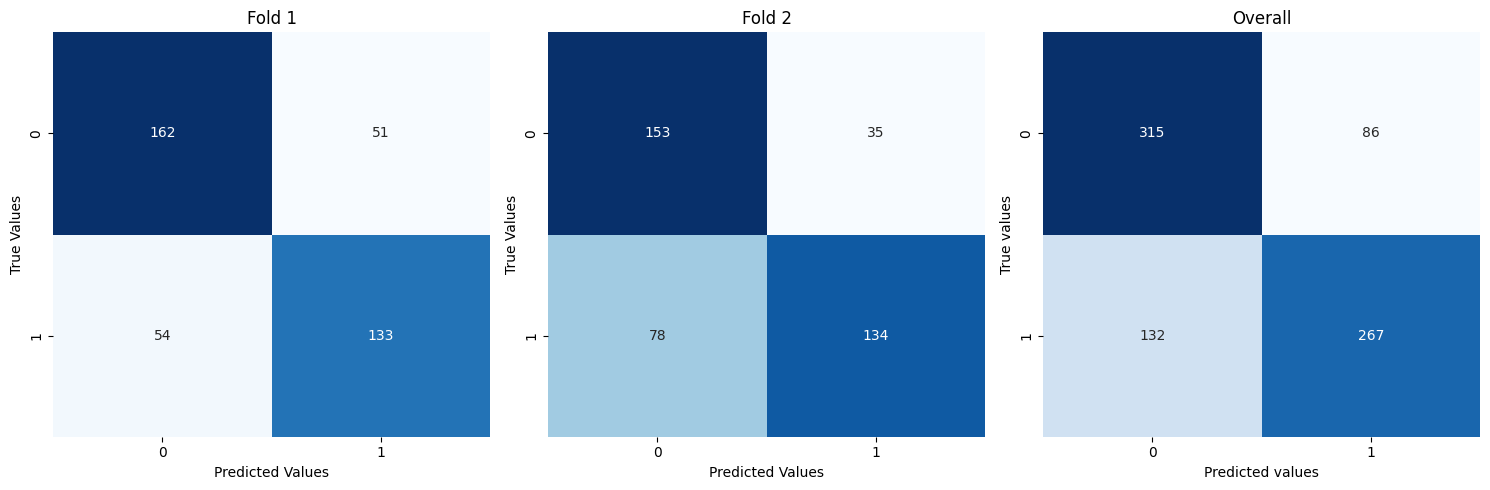

In [266]:
#3. Create confusion matrices for all 3 - folds and the overall

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

def plot_cross_val_confusion_matrix(model, X, y, cv=2):
    # Initialize figure
    num_rows = 1
    num_cols = cv + 1  # One column for each fold and one for overall
    plt.figure(figsize=(5 * num_cols, 5 * num_rows))

    # Perform cross-validation predictions
    cv_predictions = cross_val_predict(model, X, y, cv=cv)

    # Compute overall confusion matrix
    overall_cm = confusion_matrix(y, cv_predictions)

    # Plot confusion matrix for each fold
    for i in range(cv):
        fold_predictions = cv_predictions[i*len(y)//cv:(i+1)*len(y)//cv]
        fold_true_labels = y[i*len(y)//cv:(i+1)*len(y)//cv]
        fold_cm = confusion_matrix(fold_true_labels, fold_predictions)

        plt.subplot(num_rows, num_cols, i+1)
        sns.heatmap(fold_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f'Fold {i+1}')
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')

    # Plot overall confusion matrix
    plt.subplot(num_rows, num_cols, num_cols)
    sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Overall')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')

    plt.tight_layout()
    plt.show()

plot_cross_val_confusion_matrix(sgd_clf, X_train_sc, y_train, cv=2)

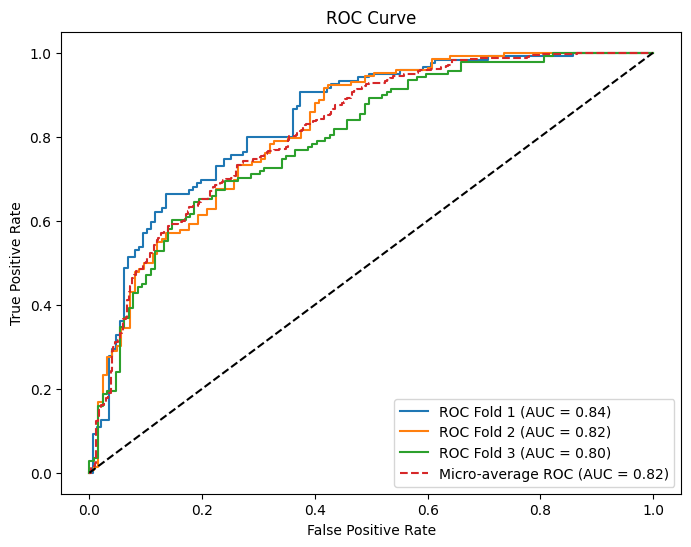

In [267]:
#4. Plotting ROC-AUC curves for all the 3-folds

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Get cross-validated predicted probabilities
y_scores = cross_val_predict(sgd_clf, X_train_sc, y_train, cv=2, method='decision_function')

# Compute ROC curve for each fold
fpr = []
tpr = []
roc_auc = []

for i in range(3):  # Number of folds
    fpr_fold, tpr_fold, _ = roc_curve(y_train[i*len(y_train)//3:(i+1)*len(y_train)//3],
                                       y_scores[i*len(y_train)//3:(i+1)*len(y_train)//3])
    fpr.append(fpr_fold)
    tpr.append(tpr_fold)
    roc_auc.append(auc(fpr_fold, tpr_fold))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_train, y_scores)
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each fold
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC Fold {i+1} (AUC = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:0.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()